In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
train = pd.read_csv('../data/train_ship_segmentations_v2.csv')
train.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


In [3]:
train.shape

(231723, 2)

## Sample images with ships

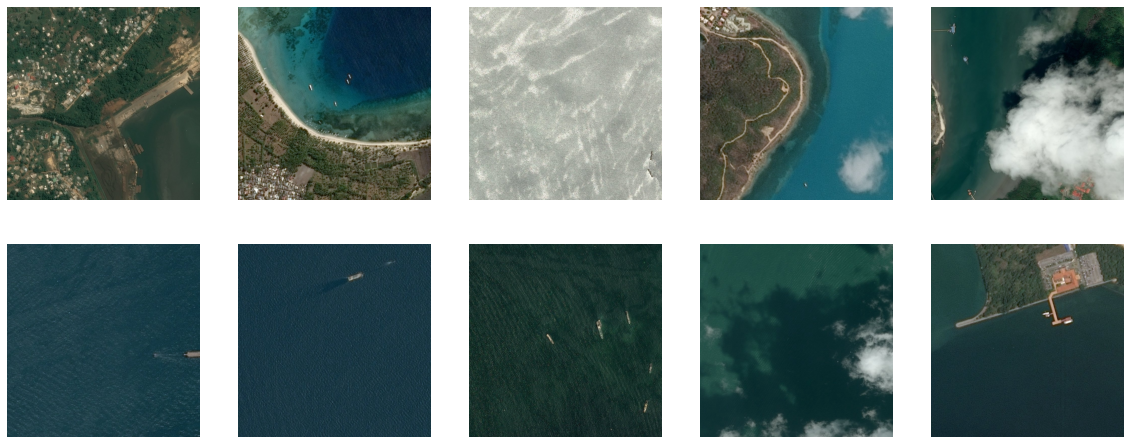

In [4]:
figure, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
sample = train[~train.EncodedPixels.isna()].sample(10)

for item in zip(axes.ravel(), sample.ImageId):
    ax, num = item
    img = mpimg.imread('../data/train_v2/{}'.format(num))
    ax.imshow(img)
    ax.axis('off')

## Sample images without ships

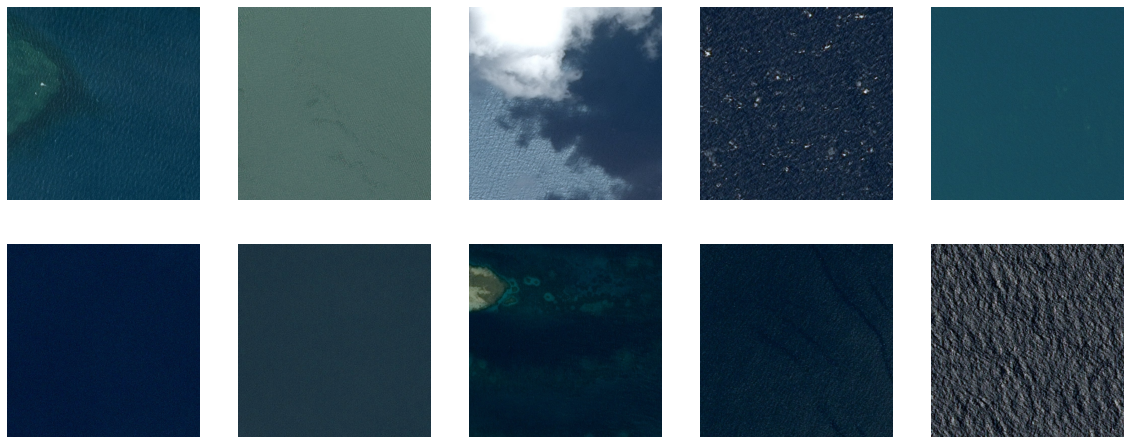

In [5]:
figure, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
sample = train[train.EncodedPixels.isna()].sample(10)

for item in zip(axes.ravel(), sample.ImageId):
    ax, num = item
    img = mpimg.imread('../data/train_v2/{}'.format(num))
    ax.imshow(img)
    ax.axis('off')

## Class balance

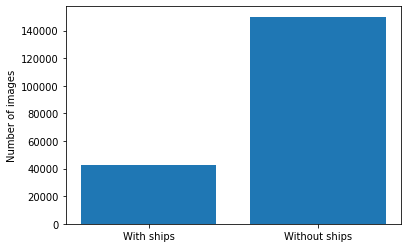

In [6]:
ships = train[~train.EncodedPixels.isna()].ImageId.unique()
noships = train[train.EncodedPixels.isna()].ImageId.unique()

plt.bar(['With ships', 'Without ships'], [len(ships), len(noships)])
plt.ylabel('Number of images')
plt.show()

## Distribution of objects on images with ships

In [7]:
ships = train.dropna().groupby('ImageId').count()
ships.describe()

,EncodedPixels
count,42556.000000
mean,1.920364
std,1.906073
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,15.000000


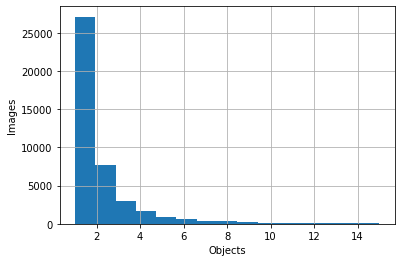

In [8]:
ships.EncodedPixels.hist(bins=15)
plt.xlabel('Objects')
plt.ylabel('Images')
plt.show()

## Color distribution

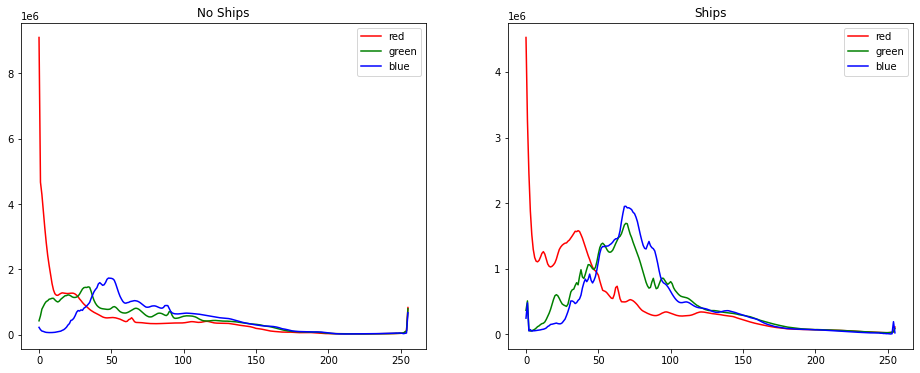

In [9]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

mask = train.EncodedPixels.isna()
for i, (msk, label) in enumerate(zip([mask, ~mask], ['No Ships', 'Ships'])):
    ids = train[msk].ImageId.sample(200)
    imgs = np.array([mpimg.imread('../data/train_v2/{}'.format(i)) for i in ids])
    
    red = imgs[:, :, :, 0]
    green = imgs[:, :, :, 1]
    blue = imgs[:, :, :, 2]
    
    axes[i].plot(np.bincount(red.ravel()), color='red', label='red')
    axes[i].plot(np.bincount(green.ravel()), color='green', label='green')
    axes[i].plot(np.bincount(blue.ravel()), color='blue', label='blue')
    
    axes[i].legend()
    axes[i].title.set_text(label)